In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:\Users\jsol\Desktop\RCI\4semester\Programmierung und Regelung für Mensch-Roboterinteraktion\Lab files\log_wireloop.log"
try:
    df = pd.read_csv(file_path, delimiter="\t")  # Assuming tab-separated values
except Exception as e:
    print("Error reading file:", e)
    exit()

In [26]:
# Read the log file
try:
    df = pd.read_csv(file_path, delimiter="\t")  # Assuming tab-separated values
except Exception as e:
    print("Error reading file:", e)
    exit()

# Ensure the required columns exist
if "X" in df.columns and "Y" in df.columns:
    # Extract the X and Y columns
    xy_data = df[["X", "Y"]].to_numpy()
    x= xy_data[:,0]
    y= xy_data[:,1]
    # Save to a CSV file
    #output_file = "/mnt/data/extracted_xy.csv"
    #xy_data.to_csv(output_file, index=False)
    #print(f"Extracted data saved to: {output_file}")
else:
    print("Error: Columns 'X' and 'Y' not found in the file.")

609


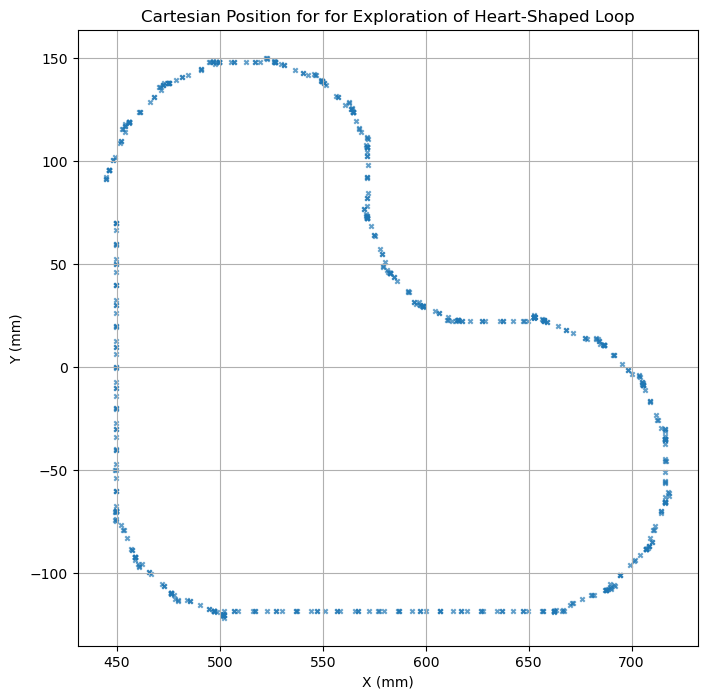

In [28]:
print(x.shape[0])
cut= 600
x_split = x[0:cut]
y_split = y[0:cut]
# Create the plot
plt.figure(figsize=(8, 8))
plt.scatter(x_split, y_split, marker='x', s=10, alpha=0.7)  # Use scatter plot instead of line plot
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("Cartesian Position for for Exploration of Heart-Shaped Loop")
plt.axis("equal")  # Ensure the same scale for both axes
plt.grid(True)
    
    # Show the plot
plt.show()

In [392]:
def find_constant_sequences(arr, min_length, tolerance):
    """Detect constant sequences with a length of at least `min_length`."""
    subsequences = []
    start_idx = 0
    indices = []

    # Iterate through the array to find constant sequences
    for i in range(1, len(arr)):
        if abs(arr[i] - arr[i - 1]) > tolerance:  # Sequence breaks
            # Check if the length of the constant subsequence is greater than or equal to min_length

            if i - start_idx >= min_length:
                subsequences.append(arr[start_idx:i])  # Append constant subsequence
                indices.append(np.arange(start_idx, i))
            start_idx = i  # Reset start index for the next subsequence
            
            

    # Check for the last subsequence after the loop
    if len(arr) - start_idx >= min_length:
        subsequences.append(arr[start_idx:])
        indices.append(np.arange(start_idx, i))
    #print(j)
    #print(indices)
    #for i in range (len(subsequences)):
         
     #   print(np.mean(subsequences[i]))
    
    return subsequences, len(subsequences),indices



#print(w[1])
#print(w[2])


In [285]:
def merge_similar_sequences(sequences, indices, tolerance=10):
    """Merge sequences with similar means (within ±tolerance)."""
    merged_sequences = []
    merged_indices = []
    
    # Sort sequences by mean to simplify merging
    sorted_data = sorted(zip(sequences, indices), key=lambda x: np.mean(x[0]))

    # Initialize first group
    temp_seq = list(sorted_data[0][0])  # Store values
    temp_idx = list(sorted_data[0][1])  # Store indices

    for i in range(1, len(sorted_data)):
        seq, idx = sorted_data[i]  # Current sequence and indices
        prev_mean = np.mean(temp_seq)  # Mean of the merged group
        current_mean = np.mean(seq)  # Mean of the current sequence

        if abs(current_mean - prev_mean) <= tolerance:  # If similar, merge
            temp_seq.extend(seq)  # Append values
            temp_idx.extend(idx)  # Append indices
        else:
            merged_sequences.append(np.array(temp_seq))  # Store previous group
            merged_indices.append(np.array(temp_idx))
            temp_seq = list(seq)  # Start a new group
            temp_idx = list(idx)

    # Append the last group
    merged_sequences.append(np.array(temp_seq))
    merged_indices.append(np.array(temp_idx))

    return merged_sequences, merged_indices

In [352]:
def find_lines_along_x(sequence,indices,y,delta):
    x_values = np.array(sequence)
    indices = np.array(indices)
    indices = np.append(indices, indices[-1])

    mean_of_sequence = np.mean(sequence)
    print(mean_of_sequence)
    low_lim = mean_of_sequence+delta
    upper_lim = mean_of_sequence-delta
    j = 0
    fitted_x = np.empty((0, 4))
    
    for i, x_values in enumerate(sequence):
        if upper_lim <= x_values <= low_lim:
            new_row = np.array([j,i, sequence[i],y[indices[i]]])
            #print(new_row)
            fitted_x= np.vstack((fitted_x, new_row))
            #y_position = y[i]
            #corresponding_y = np.vstack((corresponding_y, y_position))
            j = j+1
    x_average = np.mean(fitted_x[:, 2])    
    mean_array = np.full(j, x_average).reshape(-1,1)
    corresponding_y = fitted_x[:, 3].reshape(-1, 1)
    
    return mean_array, corresponding_y


In [470]:
#print(x.shape)
subsequences, lenght, indices= find_constant_sequences(x, 50,2)
merged_sequences,merged_indices = merge_similar_sequences(subsequences, indices, tolerance=10)

mean_arrays = []  # Store mean_array for each cycle
corresponding_ys = []  # Store corresponding_y for each cycle
edge_ys = []  # Store edge ys for each cycle

for i in range (len(merged_sequences)):
        mean_array, corresponding_y= find_lines_along_x(merged_sequences[i],merged_indices[i],y,20)
        mean_arrays.append(mean_array)
        corresponding_ys.append(corresponding_y)
        edge_y = (corresponding_y[0],corresponding_y[len(corresponding_y)-1])
        edge_ys.append(edge_y)
print(len(corresponding_ys[1]))
mean_arrays[0][0]

449.352125
584.1966543209877
81


array([449.352125])

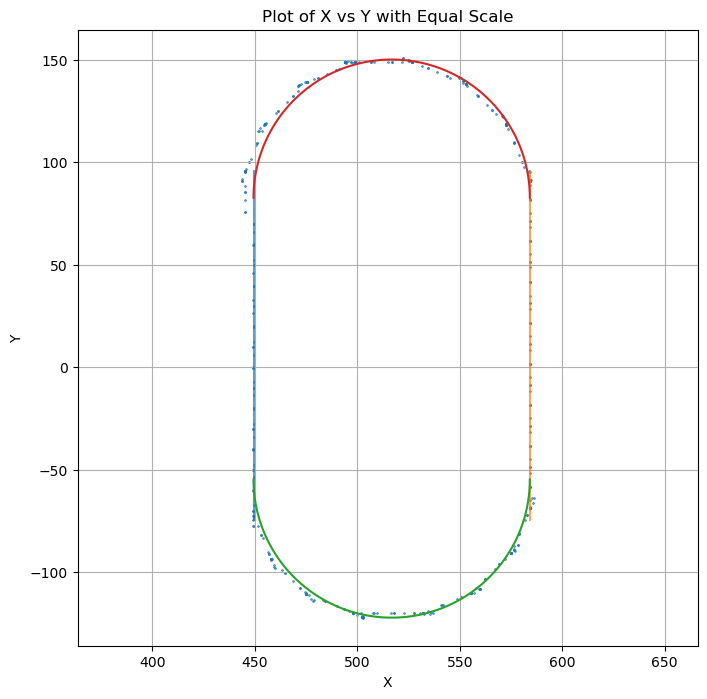

In [503]:

# Create the plot
vector_list = [mean_arrays[0][0]] * len(corresponding_ys[1])
plt.figure(figsize=(8, 8))
plt.plot(vector_list, corresponding_ys[1], linestyle='-', markersize=300, alpha=0.7)
plt.plot(mean_arrays[1], corresponding_ys[1], linestyle='-', markersize=30, alpha=0.7)
plt.scatter(x_split, y_split, marker='x', s=1.5, alpha=0.7)  # Use scatter plot instead of line plot
plt.plot(xxx, yyy+20, )
plt.plot(xxx, -yyy+8, )
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot of X vs Y with Equal Scale")
plt.axis("equal")  # Ensure the same scale for both axes
plt.grid(True)
    
    # Show the plot
plt.show()

In [501]:
diameter = (mean_arrays[0][0]-mean_arrays[1][0])
radius = diameter / 2  # Radius of the semicircle

# Generate theta values from 0 to pi (for semicircle)
theta = np.linspace(0, np.pi, 100)

# Compute x and y coordinates
xxx = radius * np.cos(theta) + mean_arrays[0][0] - radius
yyy = radius * np.sin(theta) + corresponding_ys[1][0]
